In [1]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from factor_vae import FactorVAEDSprites, Discriminator
from datasets import train_test_random_split, load_dsprites, CustomDSpritesDatasetFactorVAE
from train import train_factor_vae, test_factor_vae
from entanglement_metric import entanglement_metric_factor_vae, entanglement_metric_beta_vae
from utils import latent_transversal
from beta_vae import Classifier

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device.type

'cpu'

In [3]:
dataset = load_dsprites("../datasets/dsprites.npz",False)

In [4]:
data_ = CustomDSpritesDatasetFactorVAE(dataset)

In [5]:
model_names = [f for f in os.listdir('trained_models') if f[-4:] =='.dat']

In [6]:
def plot_loss(loss_list, title):
    plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training "+title)
    plt.show()

In [ ]:
i=1
for name in model_names:
    model = torch.load('trained_models/'+name, map_location=device)
    print("model "+str(i)+": "+name)
    loss = entanglement_metric_factor_vae(model, data_, 300, 200, random_seeds=5)
    print("Factor Vae metric: ")
    print("Accuracy: "+str(1-loss))
    print("Beta Vae metric: ")
    classifier = Classifier()
    optimizer = torch.optim.Adam(classifier.parameters(), lr=1e-4)
    losses, accuracies, test_accuracy = entanglement_metric_beta_vae(model, classifier, optimizer, 1000,  data_, 500, 50, random_seeds=5)
    print("Test Accuracy: "+str(test_accuracy))
    plot_loss(losses, "NLL Loss")
    plot_loss(accuracies, "Accuracy")
    i+=1

model 1: betavae_beta1_e40_alldata.dat


In [11]:
print(data_.factors_names)

(b'color', b'shape', b'scale', b'orientation', b'posX', b'posY')


In [20]:
imgs = latent_transversal(model0,data_[10][0].float(),-3,3,10,7)

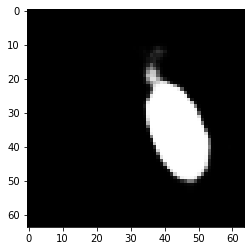

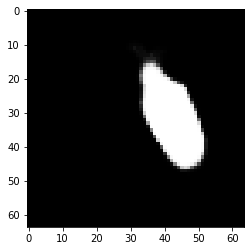

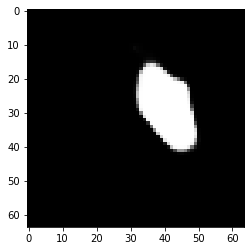

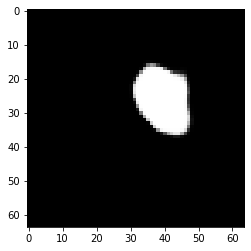

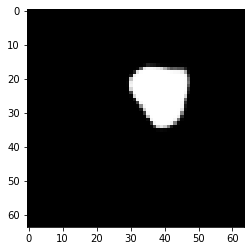

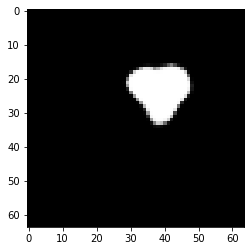

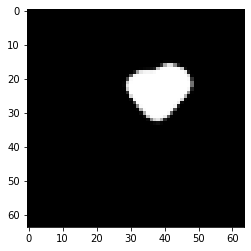

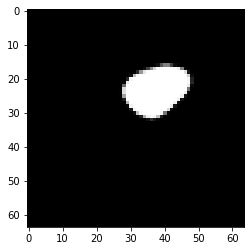

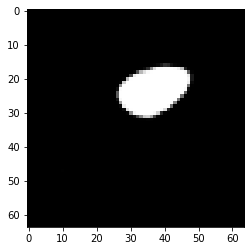

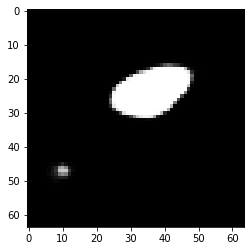

In [21]:
for img in imgs:
    plt.imshow(torch.sigmoid(img.squeeze().detach()), cmap='Greys_r')
    plt.title("")
    plt.show()